<a href="https://colab.research.google.com/github/J3r3myPerera/BTC-Price-Prediction/blob/main/BTCPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import os

In [14]:
df=pd.read_csv("BTC-USD.csv", index_col=0)

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-07-07,29907.998047,30434.644531,29777.285156,30342.265625,30342.265625,13384770155
2023-07-08,30346.921875,30374.437500,30080.160156,30292.541016,30292.541016,7509378699
2023-07-09,30291.611328,30427.589844,30085.591797,30171.234375,30171.234375,7903327692


In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
df.columns = [c.lower() for c in df.columns]

<Axes: xlabel='Date'>

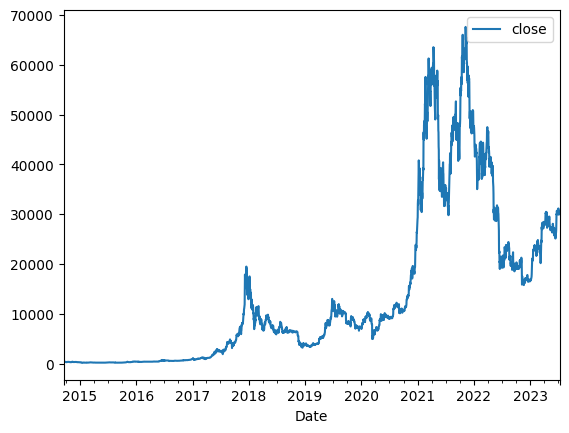

In [20]:
df.plot.line(y="close", use_index=True)


<Axes: xlabel='Date'>

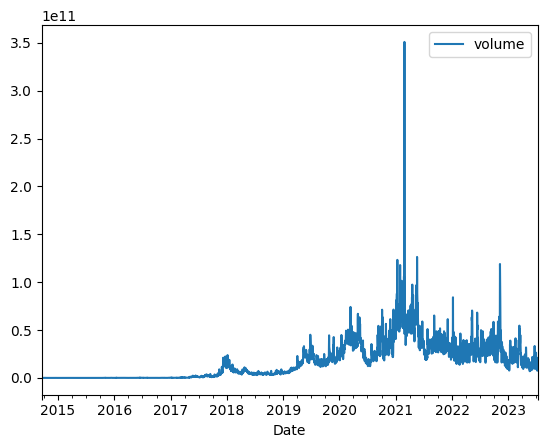

In [22]:
df.plot.line(y="volume", use_index=True)


In [23]:
import tensorflow as tf
from tensorflow import keras

In [39]:
X = df[["volume"]] #the features that I am using
y = df["close"] # the target variable



In [40]:
#for the normalization part
X_norm = (X - X.mean()) / X.std()


In [43]:
model = keras.Sequential([
    keras.layers.Dense(32, activation = 'relu', input_shape =(1,)),
    keras.layers.Dense(64, activation= 'relu'),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(1)
])

In [44]:

model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(X_norm, y, epochs=350, batch_size=64)


Epoch 1/350
51/51 [==============================] - 1s 2ms/step - loss: 442126368.0000
Epoch 2/350
51/51 [==============================] - 0s 2ms/step - loss: 441274784.0000
Epoch 3/350
51/51 [==============================] - 0s 2ms/step - loss: 434586752.0000
Epoch 4/350
51/51 [==============================] - 0s 2ms/step - loss: 407322528.0000
Epoch 5/350
51/51 [==============================] - 0s 2ms/step - loss: 338760032.0000
Epoch 6/350
51/51 [==============================] - 0s 2ms/step - loss: 232008512.0000
Epoch 7/350
51/51 [==============================] - 0s 2ms/step - loss: 153165840.0000
Epoch 8/350
51/51 [==============================] - 0s 2ms/step - loss: 134340912.0000
Epoch 9/350
51/51 [==============================] - 0s 2ms/step - loss: 132088208.0000
Epoch 10/350
51/51 [==============================] - 0s 2ms/step - loss: 131254480.0000
Epoch 11/350
51/51 [==============================] - 0s 2ms/step - loss: 130859240.0000
Epoch 12/350
51/51 [==========

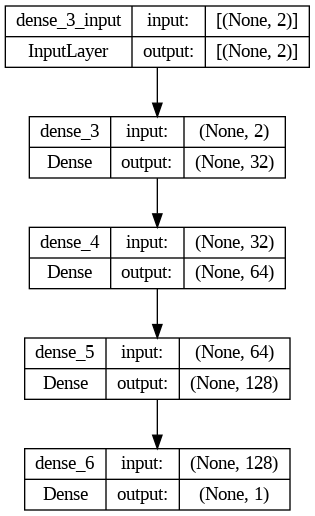

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [38]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
ERROR: Could not build wheels for pygraphviz, which is required to install pyproject.toml-based projects


In [37]:
# Generate the cell-based representation of the model
import pygraphviz as pgv
from PIL import Image

# Load the graph from the saved model visualization
graph = pgv.AGraph('model.png')

# Set the graph layout as 'dot'
graph.layout(prog='dot')

# Save the cell-based representation as an image file
graph.draw('model_cells.png')

# Display the cell-based representation
Image.open('model_cells.png').show()

ModuleNotFoundError: ignored